# Fasion-MNIST classification 

In this Assignment you are going to classify a fashion dataset.

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![](https://www.tensorflow.org/static/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png)


In [ ]:
# INSERT YOUR NAMES 

# Initialization

load all needed libraries and functions, 
check the previos tutorial how to correctly load keras and other modules

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

In [44]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))   
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))    #output layer, number of is equal to the amount of classes

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4815 - accuracy: 0.8227
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3575 - accuracy: 0.8669
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3221 - accuracy: 0.8789


In [40]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 833us/step - loss: 0.3754 - accuracy: 0.8583
0.37537017464637756 0.858299970626831


In [45]:
model.save('epic_fashion_reader.model')


INFO:tensorflow:Assets written to: epic_fashion_reader.model\assets


In [46]:
new_model = tf.keras.models.load_model('epic_fashion_reader.model')

In [47]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 824us/step


In [48]:
print(predictions)

[[4.6141646e-04 2.5293016e-04 2.7376009e-04 ... 1.3518693e-01
  1.5733078e-02 8.0303383e-01]
 [3.2746608e-04 4.3844948e-06 9.4977659e-01 ... 1.5413548e-07
  5.1670322e-05 3.0434176e-06]
 [2.6218222e-05 9.9995530e-01 3.5717767e-07 ... 9.4464969e-09
  3.4976133e-06 2.5371599e-10]
 ...
 [1.8982743e-03 1.1466513e-05 1.4374954e-04 ... 1.5390985e-06
  9.8986816e-01 1.1252491e-06]
 [1.5867230e-06 9.9998295e-01 2.7253745e-07 ... 3.4331029e-09
  7.2388343e-07 7.4384936e-11]
 [1.1408911e-05 1.2596704e-06 7.1847576e-06 ... 1.9049665e-03
  3.8371808e-04 2.8347140e-05]]


In [50]:
print(np.argmax(predictions[0]))

9


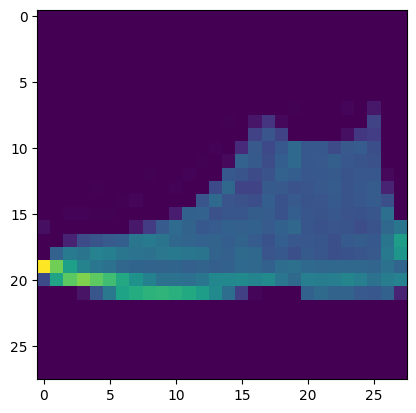

In [51]:
plt.imshow(x_test[0])

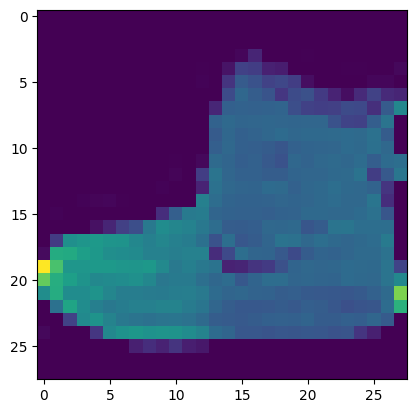

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00135942 0.    

In [12]:
plt.imshow(x_train[0])
plt.show()
print(x_train[0])

# Prepare Data

pre-process your raw input data... rescale... normalize....

## Define your Model

Define your neural network architecture here

* Describe the implemented network architecture.
* How many parameters does this network have, and where in the network are these located?

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. You can also monitor the Jetson CPU/GPU/Memory performance during this process (see Tips & Tricks)

* Explain what hyperparameters are available and what they do.
* Which hyperparameter result in better training results?

# Evaluate Model

Show the model accuracy after the training process ...
* What is the final accuracy of the trained Network?

# Save model

Save the model for later usage

# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

## Additional Questions
* In which way could the network accuracy be improved further (only explanation, no implementation)?